#Remontando Dataset Heart Disease Modulo 1#

In [28]:
#!pip install missingno

In [40]:
# Importações
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.model_selection import train_test_split # para separação em conjuntos de treino e teste
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

In [41]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Carrega a variavel com o endereço do arquivo no github que contem o dataset
#filename = "https://raw.githubusercontent.com/JGCMachado/Datasets/main/processed.cleveland.data.csv"

filename = "..\datasets\water_potability_limpo.csv"
 
# carga do dataset adicionando os nomes das colunas
water_potability = pd.read_csv(filename, dtype={'Potability': object})

In [77]:
# verifica o tipo do dataset heart_disease
print(type(water_potability))

<class 'pandas.core.frame.DataFrame'>


In [78]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
water_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [79]:
# Verificando novamente os tipos de dados das colunas
water_potability.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability          object
dtype: object

Separação dos dado em conjunto de treino e conjunto de teste.

In [80]:
# Separando os valores de output (X) do dataset no dataset heart_disease_trget
water_potability_x_atributos = water_potability.values[:,0:8]
# Separando os valores de output (Y) do dataset no dataset heart_disease_trget
water_potability_y_target = water_potability.values[:,8]

In [81]:
#Analisando a matriz de correlação de pearson podemos destacar os 6 atributos com maior covariança:
#    'grau doença arterial', 'cintilografia', 'exang' , 'angina', 'depressão segmento ST', 'bpm'

In [82]:
contagem_valores = water_potability['Potability'].value_counts()
print(contagem_valores)

0    1998
1    1278
Name: Potability, dtype: int64


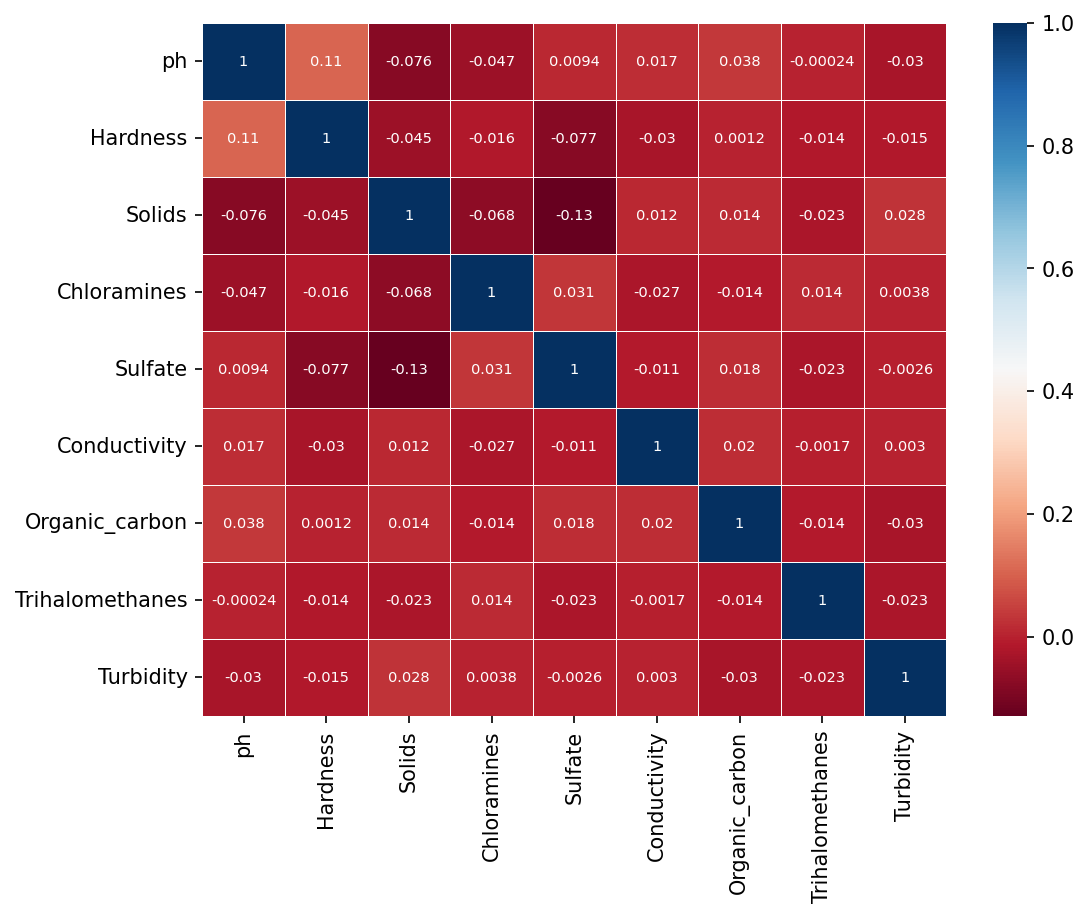

In [63]:
# Matriz de Correlação com Matplotlib Seaborn
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
sns.heatmap(water_potability.corr(), annot=True, cmap='RdBu', linewidths=0.3, ax=ax, annot_kws={'fontsize': 7} );

In [64]:
#Vamos executar também outros métodos de seleção de atributos, testaremos a eliminação recursiva de atributos com algoritmo de regressão logística (problema de uma classificação binária) e testaremos também com o método Importância de Atributos com ExtraTrees

In [83]:
# Alterando o datatype da variavel target de int64 para string
water_potability['Potability'] = water_potability['Potability'].astype(str)

In [84]:
valores_distintos = water_potability['Potability'].unique()
print(valores_distintos)

['0' '1']


In [86]:
contagem_valores = water_potability['Potability'].value_counts()
print(contagem_valores)

0    1998
1    1278
Name: Potability, dtype: int64


In [87]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=50)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=6)
fit = rfe.fit(water_potability_x_atributos, water_potability_y_target)
X_selected_LR = fit.fit_transform(water_potability_x_atributos, water_potability_y_target)

# Print dos resultados
print("Atributos Originais:", water_potability.columns[0:8])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados" 
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=water_potability.columns[0:8]))

ValueError: Unknown label type: 'unknown'

#ML Modulo 2#

In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=50)
modelo.fit(heart_disease_x_atributos,heart_disease_y_target)

importances = modelo.feature_importances_
threshold = 0.02  # Limite de importância para seleção

mask = importances > threshold

X_selected_ET = heart_disease_x_atributos[:, mask]

# Exibe os atributos orginais
print("\nAtributos Originais:", heart_disease.columns[0:13])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo). 
print(modelo.feature_importances_)

In [ ]:
# De acordo com o metodo acima os 6 atributos mais relevantes seriam:
# 'grau doença arterial', 'cintilografia', 'exang' , 'angina', 'depressão segmento ST', 'bpm'

In [ ]:
#Realizei alguns testes variando os hiperparametros max_iter da regressão logistica da eliminação recursiva e o n_estimators da ExtraTrees e ambos estabilizaram a partir do valor 50
#A seleção univariada com o SelectKbest não foi utilizada por ser mais adequada para variáveis numericas e existir no dataset variáveis categóricas.

In [ ]:
#Ao final das análises acima...

In [ ]:
# Definir percentual para teste e semente
percentual_teste = 0.20
semente = 9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_ET, heart_disease_y_target, test_size=percentual_teste, random_state=semente) # faz a divisão

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=semente) # faz o particionamento em 10 folds

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(semente)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criação e avaliação de modelos: dados padronizados e normalizados

In [ ]:
np.random.seed(semente) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()
     

In [ ]:
#Otimização dos hiperparâmetros

In [ ]:
# Tuning do CART
np.random.seed(semente) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__criterion': ['gini', 'entropy'],
    'CART__max_depth': [None, 5, 10, 20],
    'CART__min_samples_split': [2, 5, 10, 20],
    'CART__min_samples_leaf': [2, 3, 5]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = SVC()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))